In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Import helper files
from helper_clustering import import_data
from helper_nn import read_labels

# Import zipfile module
import zipfile
         
images_zip = zipfile.ZipFile('images.zip')
images_zip.extractall('Images')
 
images_zip.close()

In [2]:
# Import the dataset
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = read_labels("training_labels.csv")
train_images = import_data("Images", 'Save_3K')

# Normalization of the pixels values so that they are between 0 and 1
# train_images, test_images = train_images/255, test_images/255
# train_images = train_images/255

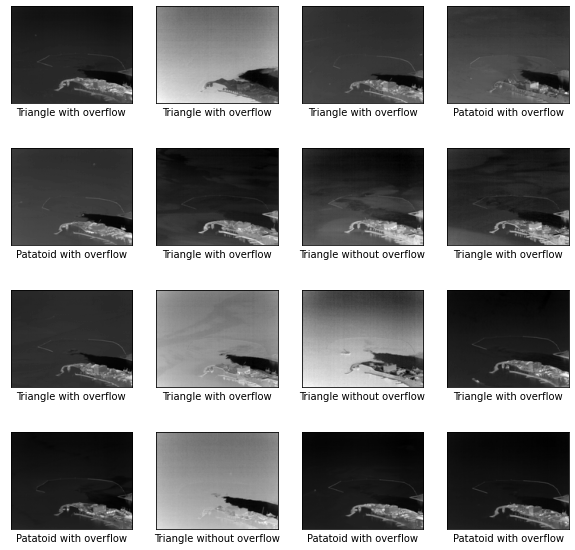

In [3]:
# Verification of the data
class_names = ['Triangle with overflow', 'Triangle without overflow', 'Patatoid with overflow']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[int(i)]])
plt.show()

In [4]:
# Creation of the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 160, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
# Summary of our model by the moment
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 36, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [6]:
# Add dense layers on top of our nn
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Summary of our model by the moment
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 158, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 36, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 64512)             0

In [8]:
# Compilation and training of our model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)#, 
                    #validation_data=(test_images, test_labels))

Epoch 1/10
25/25 [==============================] - 38s 1s/step - loss: 11.6386 - accuracy: 0.2974
Epoch 2/10
25/25 [==============================] - 24s 940ms/step - loss: 1.3047 - accuracy: 0.3731
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 1.1318 - accuracy: 0.4077
Epoch 4/10
25/25 [==============================] - 25s 956ms/step - loss: 1.1947 - accuracy: 0.4051
Epoch 5/10
25/25 [==============================] - 24s 974ms/step - loss: 1.0837 - accuracy: 0.4282
Epoch 6/10
25/25 [==============================] - 25s 1s/step - loss: 1.0485 - accuracy: 0.4718
Epoch 7/10
25/25 [==============================] - 24s 968ms/step - loss: 1.0401 - accuracy: 0.4654
Epoch 8/10
25/25 [==============================] - 25s 992ms/step - loss: 1.0294 - accuracy: 0.4705
Epoch 9/10
25/25 [==============================] - 23s 936ms/step - loss: 1.0580 - accuracy: 0.4692
Epoch 10/10
25/25 [==============================] - 24s 939ms/step - loss: 1.0017 - accuracy: 0.49

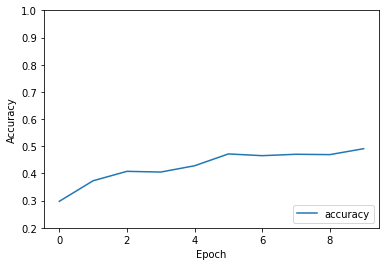

In [11]:
# Evaluation of our model
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1]) # plt.ylim([0.2, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
# print(test_acc)